# Análise Estatística de Jogos e suas Plataformas

Segue aqui um projeto de Análise de dados, de bancos de dados com informações sobre a venda de jogos.

## Iniciação

- Carregando pandas para o manejo do banco de dados
- Matplotlib para desfrutar da vizualização gráfica dos dados
- Statistics para cálculos de estatística
- Datetime para formatação das datas na coluna referente ao dia no calendário
- Seaborn como complemento ao matplotlib
- Alpha como nível crítico de significância estatística genérico mais aceito pela estatística, 5% por não ser tão rígido ao comparar a diferença das médias, mas ainda esta probabilidade é claramente muito suficiente para concluir que há uma diferença significativa entre os valores médios testados.

In [1]:
import pandas as pd
import matplotlib as plot
import statistics
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from functools import reduce
from scipy import stats as st
alpha=0.05

- Carregando Dataframe

In [2]:
df = pd.read_csv('/datasets/games.csv')


# Observando informações gerais do banco de dados
### Dados:
- Name: Nome do jogo.
- Platform: Plataforma do jogo.
- Year_Of_Release: Ano de lançamento do jogo.
- Genre: Gênero do jogo.
- NA_sales: Vendas na América do Norte.
- EU_sales: Vendas na Europa.
- JP_sales: Vendas no Japão.
- Other_sales: Vendas em outros lugares.
- Critic_Score: Pontuação do jogo pela avaliação crítica.
- User_Score: Pontuação do jogo pela avaliação dos usuários.
- Rating: Classificação indicativa do jogo.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Existem dados nulos nas colunas: Nome, Ano de lançamento, Gênero, Nota Crítica, Nota do Usuário e Rating

O ano mais novo do dataframe é 2016, portanto será feita uma previsão para o ano de 2017.

A coluna de user_score não aparece na tabela por estar com o tipo errado de dados.

# Formatando tabela e tratando dados

Padronizando o nome das colunas em minúsculo.

In [5]:
df.columns = df.columns.str.lower()

### Ratings:
- Everyone: Content is generally suitable for all ages. 
- Everyone: 10+ Content is generally suitable for ages 10 and up. 
- Teen: Content is generally suitable for ages 13 and up. 
- Mature: 17+ Content is generally suitable for ages 17 and up. 
- Adults: Only 18+.

In [6]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [7]:
print(df.columns)
#Conferindo o resultado

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [8]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Substituindo 'tbd' (to be determinated) para ausente.
Como não há método viável para preencher a avaliação do usuário, optei por deixar os valores a serem determinados ausentes

In [10]:
df['user_score']=df.user_score.replace('tbd', np.nan)

Passando coluna para tipo Float

In [11]:

df['user_score']=df['user_score'].astype(float)


Analisando dados de jogos lançados em 2016

In [12]:
df[df['year_of_release']==2016]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T
245,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M
289,Battlefield 1,PS4,2016.0,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M
...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Como a previsão realizada será para 2017, é preferível pegar mais do que apenas o ano anterior da tabela. Já que está repleta de dados nulos, pois provavelmente não conseguiram estimar as notas e a classificação, e as vendas ainda não foram completamente realizadas.

In [13]:
df['genre'].nunique()

12

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


## Dados Ausentes:

- Os dados ausentes de name vão ser mantidos, pois os dados do jogo ainda poderão serem utilizados na previsão de vendas em 2017.
- Os dados nulos do ano de lançamento vão ser mantidos, para manter a população do dataframe mais alta para os cálculos de correlação entre as colunas.
- Os dados faltantes em gênero vão ser mantidos, pois ainda podem contribuir com a quantidade de jogos totais lançados para determinada plataforma em determinado ano.
- As informações não preenchidas da nota crítica vão ser mantidas, pois certos jogos não alcançam o nível de publicidade o suficiente para conseguir essa crítica, ou não possuem esse método de avaliação onde foram lançados.
- As avaliações do usuários ausentes permaneceram assim, pois pode ser que não há avaliações o suficiente para estimá-la, e as linhas ainda podem ajudar com outras informações como quantidade de venda. As avaliações a serem determinadas foram transformadas em nulas para transformar o tipo da coluna em float e poder lidar com dados contínuos.
- Rating vazios podem ser que ainda não foram determinados.

In [15]:
df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411,-0.267851
na_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200
eu_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337
jp_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598
other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


## Índice de correlação dos dados:

### Com a tabela acima pode-se concluir que:

- As vendas tem forte relação com a avaliação crítica do jogo, uma interpretação válida é que o público compre o jogo pela nota crítica, e após usufruir do entreterimento, entregue a própria nota.


In [16]:
df['total_sale']=df['na_sales']+df['jp_sales']+df['eu_sales']+df['other_sales']

Enriquecendo a tabela com uma coluna de vendas totais.

# Análise dos Dados

### Observando distribuição de jogos ao longo dos anos:

In [17]:
pivot_year=df.pivot_table(index=['year_of_release'], values='name', aggfunc='count')


Text(0.5, 1.0, 'Jogos lançados por ano')

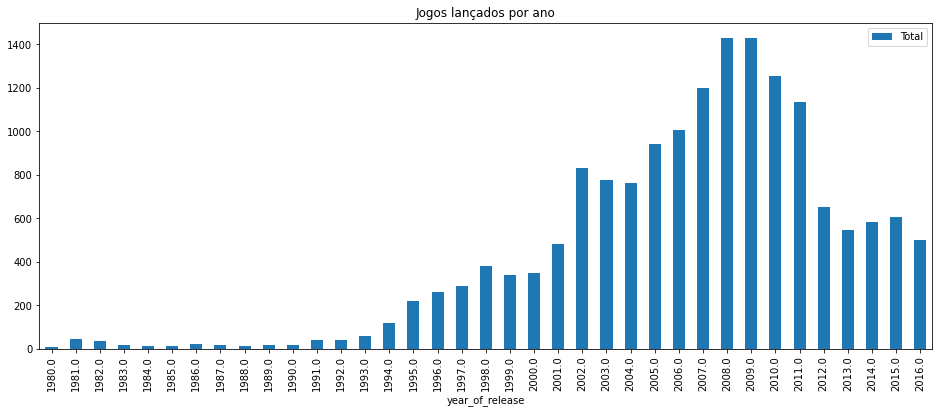

In [18]:
pivot_year.plot(kind='bar', figsize=(16,6))
plt.legend(['Total'])
plt.title('Jogos lançados por ano')

Por serem muito antigos e diferentes em quantidade, os dados anteriores a 2012 não são atrativos para análise.

### Analisando as plataformas em alta.
- DS, PS3, x360 são as três plataformas com a maior quantidade de vendas.

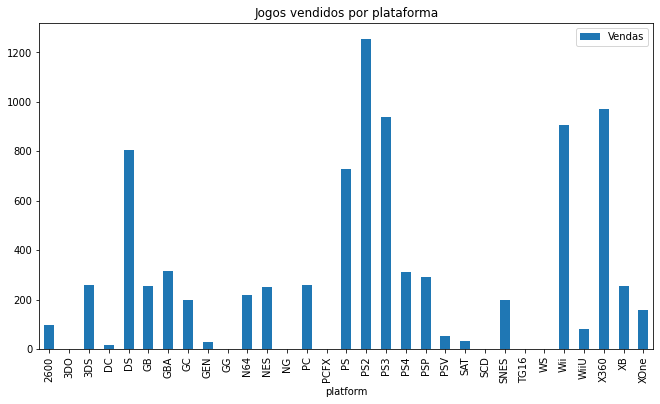

In [19]:
pivot_platform_year=df.pivot_table(index=['platform'], values='total_sale', aggfunc='sum')
pivot_platform_year.plot(kind='bar', figsize=(11,6))

plt.legend(['Vendas'])
plt.title('Jogos vendidos por plataforma');

In [20]:
pivot_ds=df[df['platform']=='DS'].pivot_table(index=['year_of_release'], values='total_sale', aggfunc='sum')

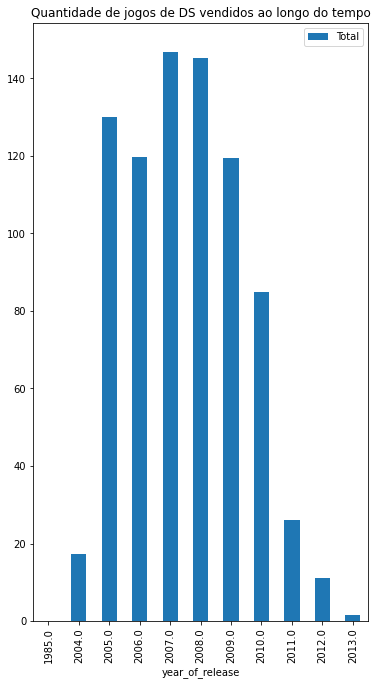

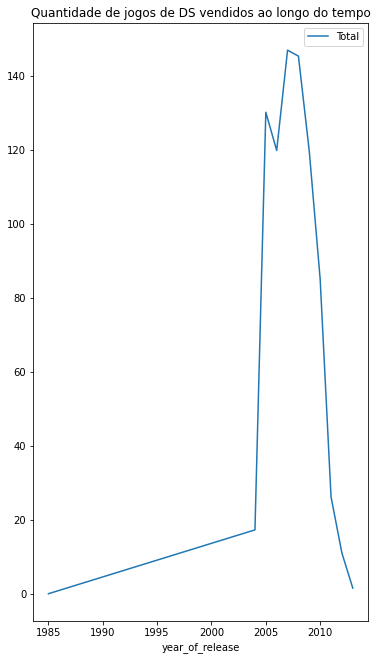

In [21]:
pivot_ds.plot(kind='bar', figsize=(6,11))
plt.title('Quantidade de jogos de DS vendidos ao longo do tempo')
plt.legend(['Total'])
pivot_ds.plot(kind='line', figsize=(6,11))

plt.legend(['Vendas'])
plt.title('Quantidade de jogos de DS vendidos ao longo do tempo')
plt.legend(['Total'])


Foram vendidos jogos do Nintendo DS ao longo de 9 anos, com um pico no 2° ano da plataforma até o 6°.

In [22]:
pivot_ps2=df[df['platform']=='PS2'].pivot_table(index=['year_of_release'], values='total_sale', aggfunc='sum')

Text(0.5, 1.0, 'Quantidade de jogos do PS2 vendidos ao longo dos anos')

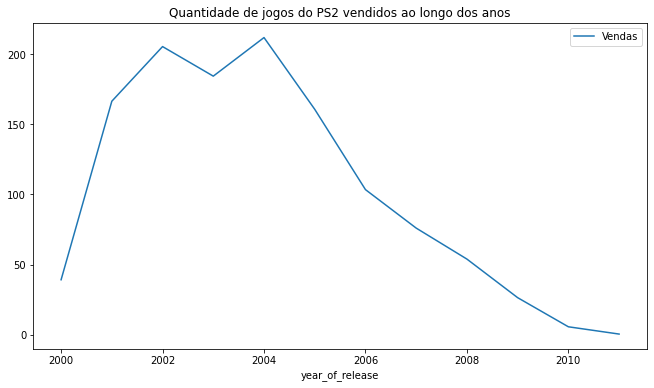

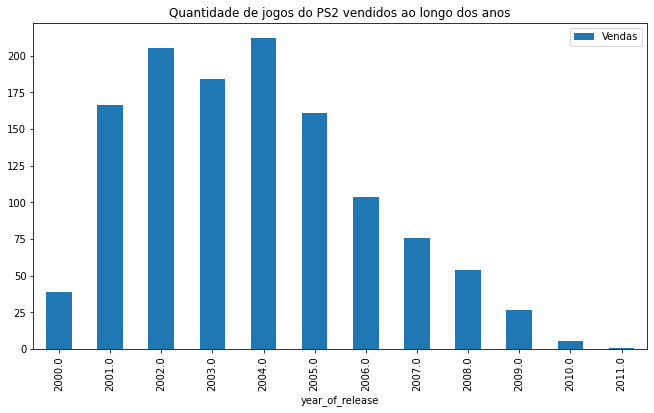

In [23]:
pivot_ps2.plot(kind='line', figsize=(11,6))
plt.legend(['Vendas'])
plt.title('Quantidade de jogos do PS2 vendidos ao longo dos anos')
pivot_ps2.plot(kind='bar', figsize=(11,6))
plt.legend(['Vendas'])
plt.title('Quantidade de jogos do PS2 vendidos ao longo dos anos')

Foram vendidos jogos para PS2 durante 11 anos, com um pico no 3° e mantendo os lançamentos em alta do 2° até o 5° ano.

Text(0.5, 1.0, 'Quantidade de jogos do X360 vendidos ao longo do tempo')

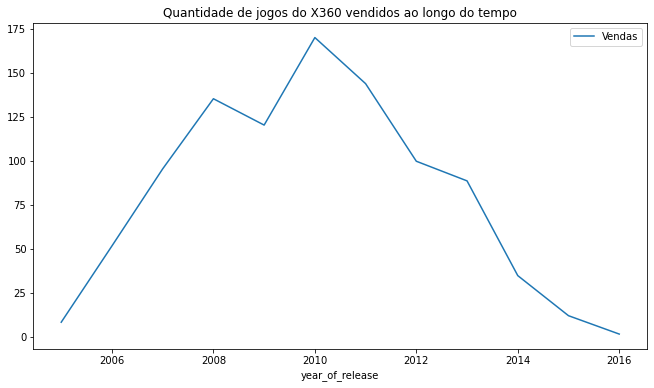

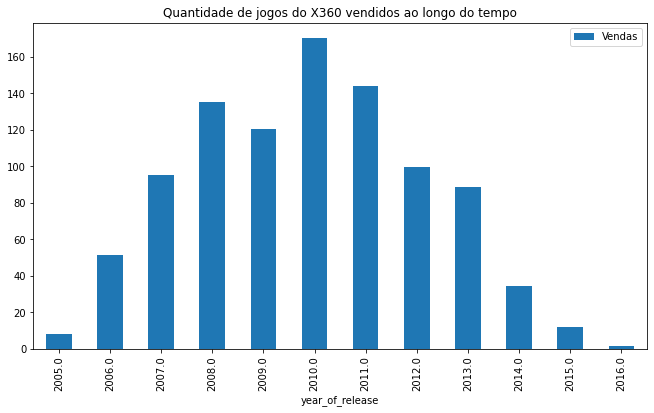

In [24]:
pivot_x360=df[df['platform']=='X360'].pivot_table(index=['year_of_release'], values='total_sale', aggfunc='sum')
pivot_x360.plot(kind='line', figsize=(11,6))
plt.title('Quantidade de jogos do X360 vendidos ao longo do tempo')
plt.legend(['Vendas'])


pivot_x360.plot(kind='bar', figsize=(11,6))
plt.legend(['Vendas'])

plt.title('Quantidade de jogos do X360 vendidos ao longo do tempo')

Foram vendidos jogos para o X360 durante 11 anos, como alta no 4° até o 7° ano.

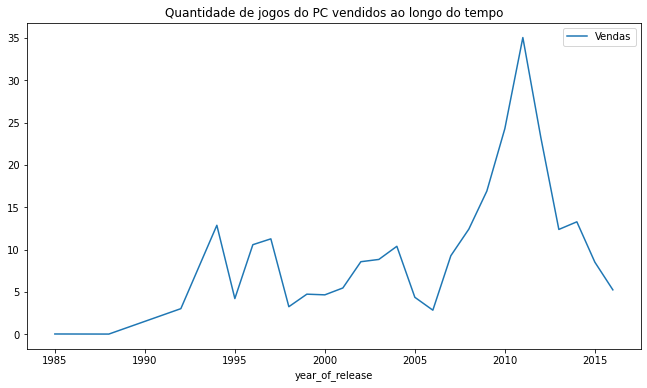

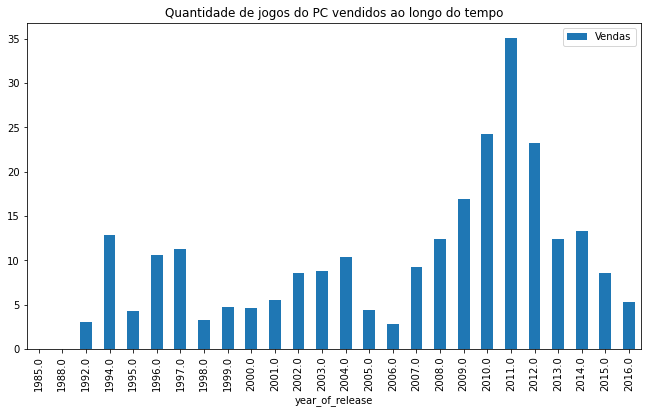

In [25]:
pivot_pc=df[df['platform']=='PC'].pivot_table(index=['year_of_release'], values='total_sale', aggfunc='sum')
pivot_pc.plot(kind='line', figsize=(11,6))
plt.title('Quantidade de jogos do PC vendidos ao longo do tempo');
plt.legend(['Vendas'])

pivot_pc.plot(kind='bar', figsize=(11,6))

plt.title('Quantidade de jogos do PC vendidos ao longo do tempo');
plt.legend(['Vendas'])


### Concluí-se que as plataformas mais famosas tendem a permanecer vendendo bem seus jogos durante 9 anos, e com alta do 3° ao 5° ano de plataforma.

# Analisando dados partindo do ano de 2014

In [26]:
# Criando dataframe com anos filtrados.
dfc=df[df['year_of_release']>2013]

In [27]:
#Analisando as plataformas recentes com maiores números de vendas.
dfc['platform'].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

Text(0.5, 1.0, 'Jogos PS4')

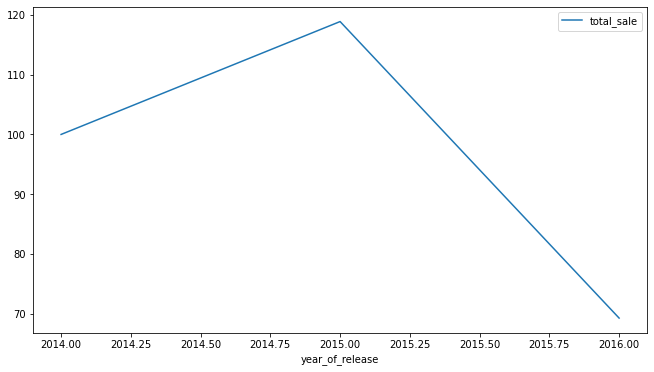

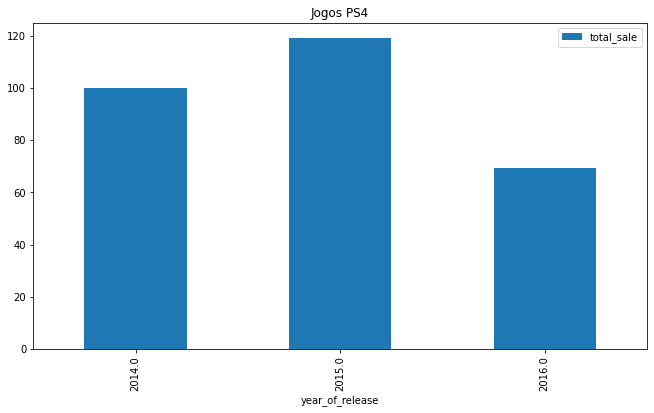

In [28]:
pivot_ps4=dfc[dfc['platform']=='PS4'].pivot_table(index=['year_of_release'], values='total_sale', aggfunc='sum')
pivot_ps4.plot(kind='line', figsize=(11,6))

pivot_ps4.plot(kind='bar', figsize=(11,6))
plt.title('Jogos PS4')

### Analisando a progressão de vendas do PS4 durante os anos, é concluível que a distribuição se assemelhe com os analisados acima, logo, em 2017 haverá um aumento de vendas para PS4 ou uma estabilização.

Text(0.5, 1.0, 'Jogos PSV')

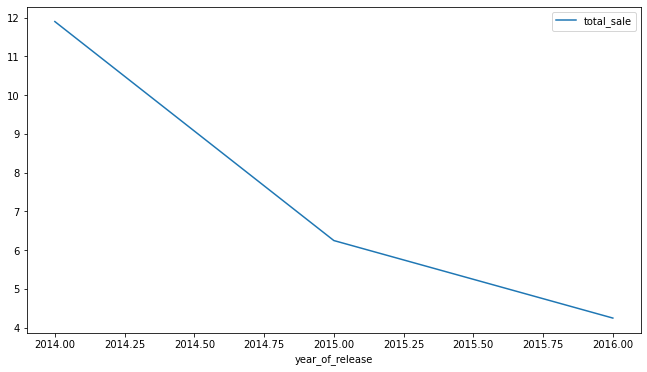

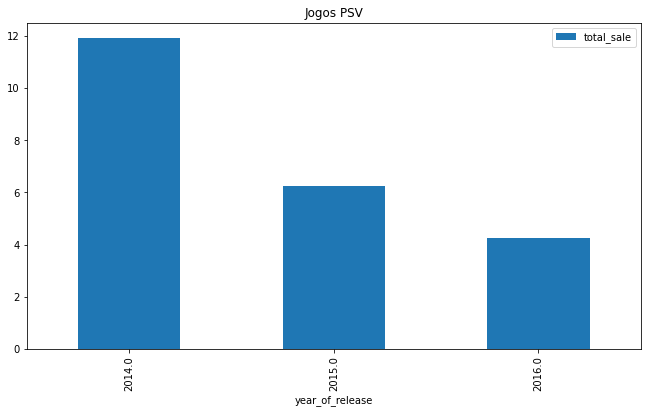

In [29]:
pivot_psv=dfc[dfc['platform']=='PSV'].pivot_table(index=['year_of_release'], values='total_sale', aggfunc='sum')
pivot_psv.plot(kind='line', figsize=(11,6))

pivot_psv.plot(kind='bar', figsize=(11,6))

plt.title('Jogos PSV')

### Analisando a distribuição de jogos vendidos para PSV durante os anos, é concluível que a distribuição se assemelhe com os analisados acima, logo, em 2017 haverá uma queda de vendas para PSV.

Text(0.5, 1.0, 'Jogos XONE')

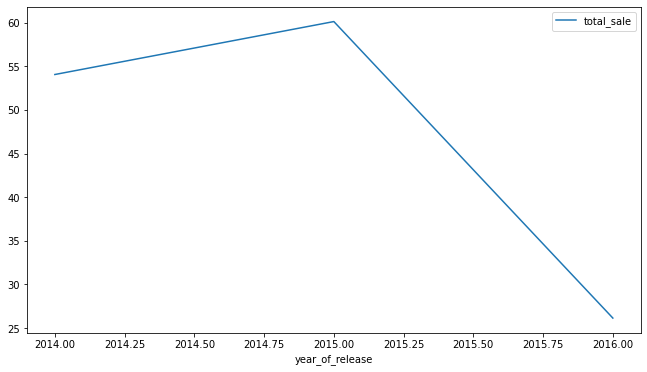

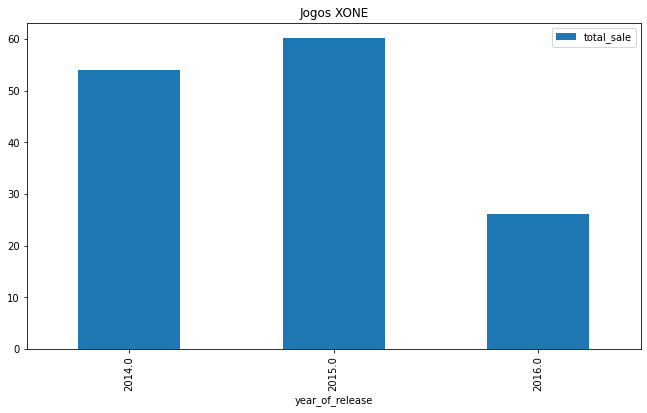

In [30]:
pivot_x1=dfc[dfc['platform']=='XOne'].pivot_table(index=['year_of_release'], values='total_sale', aggfunc='sum')
pivot_x1.plot(kind='line', figsize=(11,6))

pivot_x1.plot(kind='bar', figsize=(11,6))
plt.title('Jogos XONE')

### Analisando a progressão de vendas do XONE durante os anos, é concluível que a distribuição se assemelhe com os analisados acima, logo, em 2017 haverá um aumento de vendas para XONE ou uma estabilização.

Text(0.5, 1.0, 'Jogos 3DS')

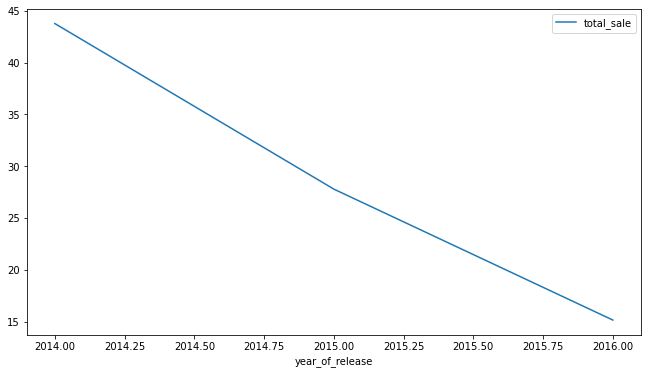

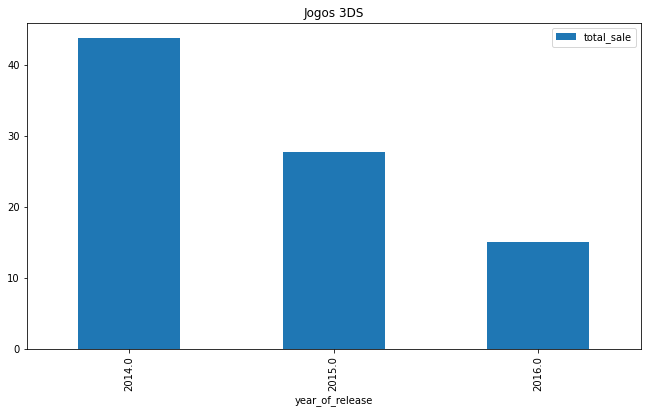

In [31]:
pivot_3ds=dfc[dfc['platform']=='3DS'].pivot_table(index=['year_of_release'], values='total_sale', aggfunc='sum')
pivot_3ds.plot(kind='line', figsize=(11,6))

pivot_3ds.plot(kind='bar',figsize=(11,6))
plt.title('Jogos 3DS')

### Analisando a distribuição de jogos vendidos para 3DS durante os anos, é concluível que a distribuição se assemelhe com os analisados acima, logo, em 2017 haverá uma queda de vendas de jogos para 3DS.

Text(0.5, 1.0, 'Jogos PC')

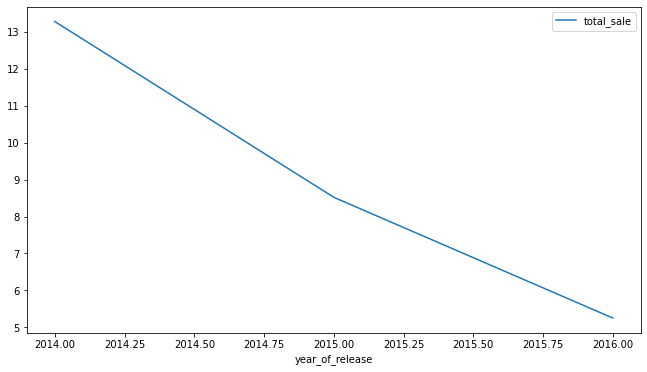

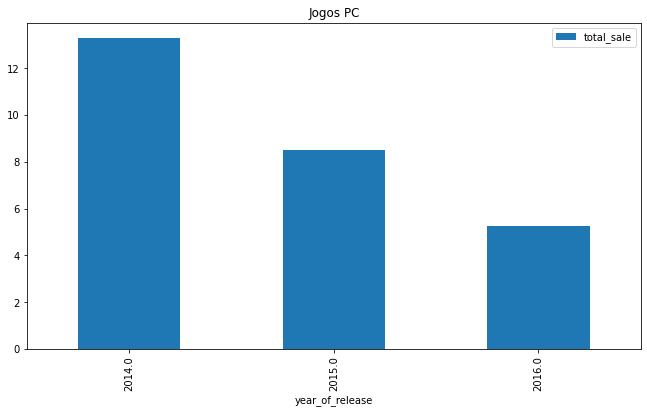

In [32]:
pivot_pc=dfc[dfc['platform']=='PC'].pivot_table(index=['year_of_release'], values='total_sale', aggfunc='sum')
pivot_pc.plot(kind='line', figsize=(11,6))

pivot_pc.plot(kind='bar', figsize=(11,6))
plt.title('Jogos PC')

### Pelo PC conseguir ser melhorado ao longo dos anos, a plataforma não fica defasada com o passar do tempo, logo é esperado que as vendas permaneçam estáveis.

Text(0.5, 1.0, 'Jogos WiiU')

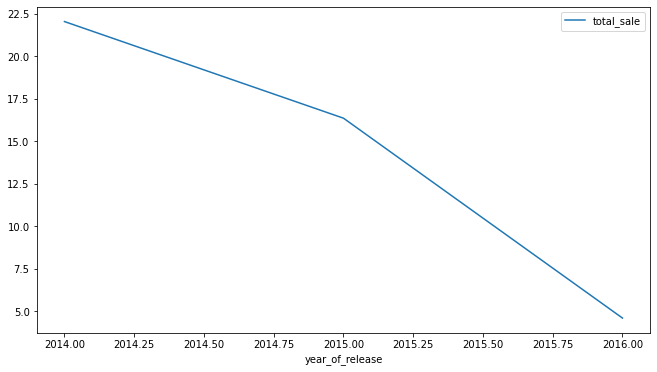

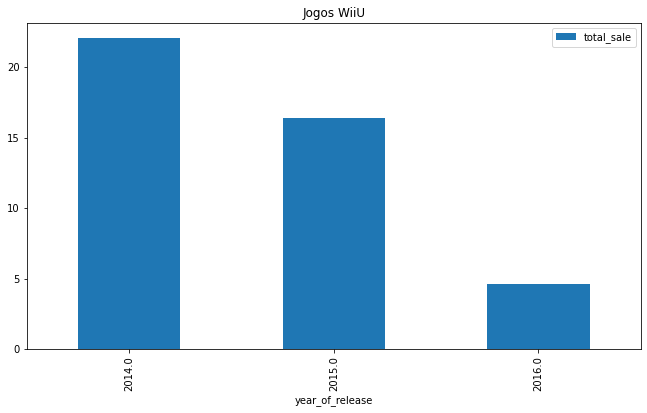

In [33]:
pivot_x1=dfc[dfc['platform']=='WiiU'].pivot_table(index=['year_of_release'], values='total_sale', aggfunc='sum')
pivot_x1.plot(kind='line', figsize=(11,6))

pivot_x1.plot(kind='bar', figsize=(11,6))
plt.title('Jogos WiiU')

### É observável que o auge do WiiU já acabou, e as vendas diminuam bruscramente em 2017.

<AxesSubplot:>

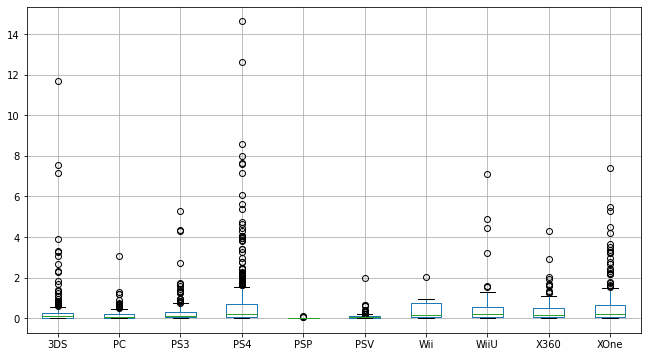

In [34]:
plat_pivot= dfc.pivot_table(index='name', columns='platform',values='total_sale', aggfunc='sum')
plat_pivot.boxplot(figsize=(11,6))

Analisando com boxplot e os gráficos acima as vendas e lançamentos de cada plataforma é notável que as atuais, e mais rentáveis, plataformas são:
- XONE
- PS4
- PC

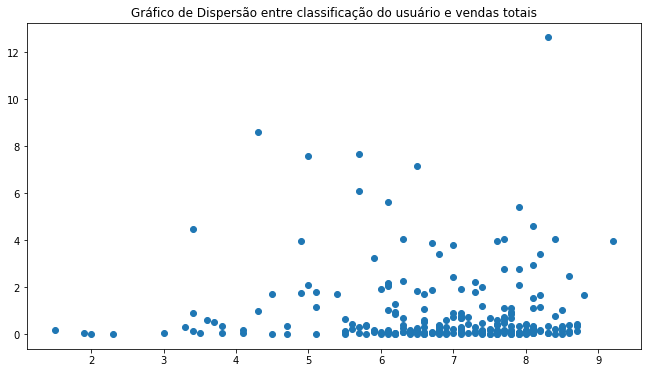

In [35]:
plt.figure(figsize=(11, 6))

plt.scatter(dfc[dfc['platform']=='PS4']['user_score'], dfc[dfc['platform']=='PS4']['total_sale'])
plt.title('Gráfico de Dispersão entre classificação do usuário e vendas totais')
plt.show();

Pode-se observar uma tendência do número de vendas aumentar conforme as notas dos usuários aumentam.

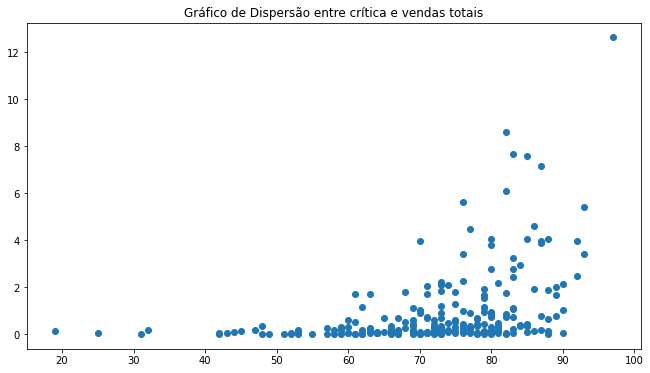

In [36]:
plt.figure(figsize=(11, 6))

plt.scatter(dfc[dfc['platform']=='PS4']['critic_score'], dfc[dfc['platform']=='PS4']['total_sale'])
plt.title('Gráfico de Dispersão entre crítica e vendas totais')
plt.show();

Pode-se observar uma tendência do número de vendas aumentar conforme as nota crítica aumenta.

<AxesSubplot:>

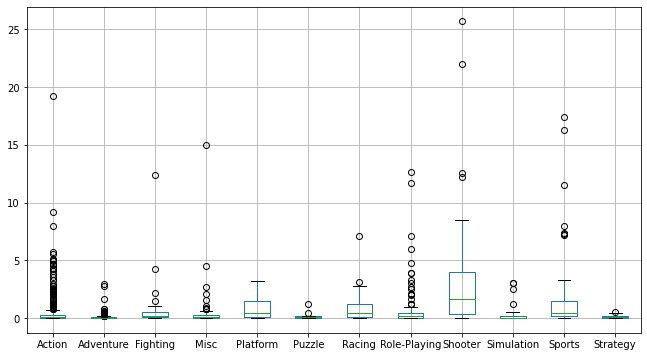

In [37]:
genre_pivot= dfc.pivot_table(index='name', columns='genre',values='total_sale', aggfunc='sum')
genre_pivot.boxplot(figsize=(11,6))

É observável que Shooter é o gênero de jogo com maior média e mediana de vendas, sendo um tipo de lançamento seguro para as plataformas.

# Criando perfis para cada continente.

In [38]:
def continent(region):
    plat=dfc.groupby('platform')[region].sum()
    genre=dfc.groupby('genre')[region].sum()
    rating=dfc.groupby('rating')[region].sum()
    #print(plat.nlargest(5), genre.nlargest(5), rating.nlargest(5))
    if region=='jp_sales':
        nome='Japão'
    elif region=='na_sales':
        nome='América do Norte'
    elif region=='eu_sales':
        nome='Europa'
    print(f'-----Plataformas mais usadas: {nome}------')
    print(plat.nlargest(5));
    print(f'-----Gêneros mais jogados: {nome}------')
    print(genre.nlargest(5));
    print(f'-----Principais classificações indicativas nos jogos: {nome}------')
    
    print(rating.nlargest(5));
    plat.plot(kind='bar', figsize=(11,6))
    plot.title=(f'{nome}')

-----Plataformas mais usadas: Japão------
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64
-----Gêneros mais jogados: Japão------
genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64
-----Principais classificações indicativas nos jogos: Japão------
rating
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64


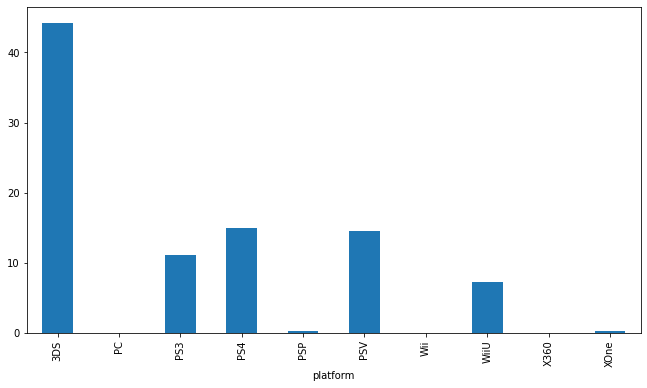

In [39]:
continent('jp_sales')

-----Plataformas mais usadas: América do Norte------
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64
-----Gêneros mais jogados: América do Norte------
genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64
-----Principais classificações indicativas nos jogos: América do Norte------
rating
M       96.42
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64


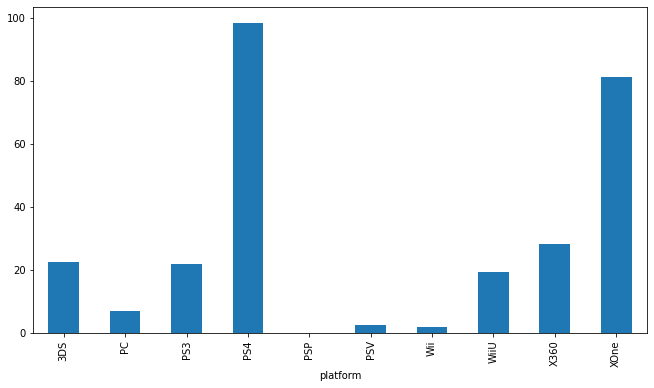

In [40]:
continent('na_sales')

-----Plataformas mais usadas: Europa------
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64
-----Gêneros mais jogados: Europa------
genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64
-----Principais classificações indicativas nos jogos: Europa------
rating
M       93.44
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64


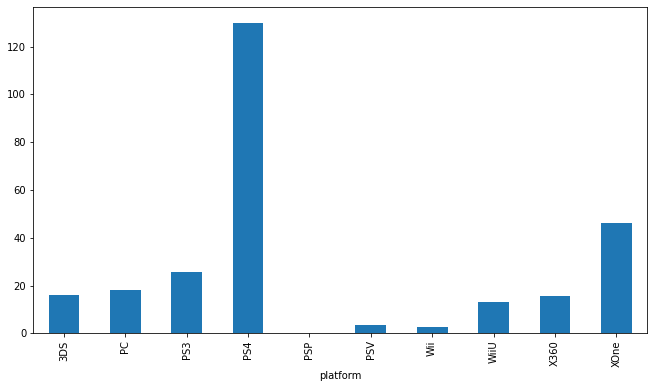

In [41]:
continent('eu_sales')

# Análise Estatística de Dados

- Definindo as populações para os valores das notas dos usuários nas plataformas XOne e PC

In [42]:
xbox=dfc['user_score'][dfc['platform']=='XOne']
pc=dfc['user_score'][dfc['platform']=='PC']



- Usando teste de significância para comparar com alpha se as populações são relevantemente diferentes.

In [43]:
significancia_plat=st.ttest_ind(xbox, pc ,nan_policy='omit')

In [44]:
if significancia_plat.pvalue < alpha:
    print("Rejeitamos a hipótese nula, logo as populações possuem médias de notas significativamente diferentes.")
else:
    print("Nós não podemos rejeitar a hipótese nula, logo, as populações de XOne e Pc não diferem significativamente em suas notas de jogos.") 

Nós não podemos rejeitar a hipótese nula, logo, as populações de XOne e Pc não diferem significativamente em suas notas de jogos.


- Definindo as populações para os valores das notas dos usuários para jogos de ação e esportes.

In [45]:
action=dfc['user_score'][dfc['genre']=='Action']
sports=dfc['user_score'][dfc['genre']=='Sports']
action=action.dropna()
sports=sports.dropna()


- Usando teste de significância para comparar com alpha se as populações são relevantemente diferentes.

In [46]:
significancia_genre=st.ttest_ind(action, sports)

In [47]:
if significancia_genre.pvalue < alpha:
    print("Rejeitamos a hipótese nula, logo as populações possuem médias de avaliação significativamente diferentes entre os jogos.")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

Rejeitamos a hipótese nula, logo as populações possuem médias de avaliação significativamente diferentes entre os jogos.


In [48]:
action.mean()

6.760606060606061

In [49]:
sports.mean()

5.2251968503937

As notas para jogos de ação são superiores as notas de esportes.

# Conclusão

## Dados Gerais

- A tabela possui dados faltantes em nome, ano de lançamento, gênero, nota crítica, nota do usuário e classificação. Os dados não foram preenchidos pois não há uma estimativa segura que os complete sem influenciar no valor real do banco de dados, assim foram utilizados apenas os valores que o banco de dados entregava. 
- Os dados de user_score possuíam entre eles a string "tbd", a qual foi substituida por valores nulos, já que eram dados a serem determinados que não estavam presentes. Assim também foi possível transformar user_score em uma variável contínua, para facilitar em sua análise.
- Para padronização do dataframe foram renomeadas as colunas com letras apenas minúsculas.
- A tabela foi enriquecida com uma coluna de vendas totais, somando as vendas de todas as áreas.

## Análise dos Dados

### Análise de todos os anos:

- Por serem muito antigos e diferentes em quantidade, os dados anteriores a 2012 não são atrativos para análises de previsão.
- DS, PS3, WII são as três plataformas com a maior quantidade de vendas do banco de dados.
- Concluí-se que as plataformas tendem a permanecer renovando seus jogos durante 9 anos, e com alta do 3° ao 5° ano de plataforma.

### Análise com dados a partir do ano de 2014 para realizar a previsão para 2017:

- Analisando a progressão de vendas do PS4 e XOne durante os anos, é concluível que a distribuição se assemelhe com do DS,PS3 e Wii, logo, em 2017 haverá um aumento de jogos vendidos para PS4 e XOne ou uma estabilização.
- Analisando a distribuição de jogos vendidos para WiiU, PSV e 3DS durante os anos, é concluível que a distribuição se assemelhe com DS, PS3 e Wii, logo, em 2017 haverá uma queda de jogos vendidos para WiiU, PSV e 3DS pois já ultrapassaram seu pico.
- Pelo PC conseguir ser melhorado ao longo dos anos, a plataforma não fica defasada com o passar do tempo, logo é esperado que as vendas permaneçam estáveis em 2017.

## Análise Estatística dos Dados

### Há diferença da pontuação do usuário por jogo dependendo da plataforma XOne ou PC?

- De acordo com o ttest realizado, a amostra da população não possuí diferência de média significativa para a nota em ambas as plataformas, então as populações de XOne e Pc não diferem significativamente em suas notas de jogos.

### Há diferença da pontuação do usuário por jogo dependendo do gênero de ação ou esportes?

- De acordo com o ttest realizado, a amostra da população possuí diferença de média significativa, onde ação recebe melhores avaliações pelos usuários em comparação a esporte, então as populações possuem médias de avaliação significativamente diferentes entre os gêneros.

## Previsão para 2017

### Plataformas em alta:
- PS4
- XOne
- PC

### Gêneros em alta:
- Shooter
- Action

### Logo deve-se investir em lançamentos de jogos de ação ou tiro, para as plataformas PS4, XOne e Pc para o ano seguinte.